In [28]:
# John Mayer Jr
# NetFlix Data Science BootCamp

# Import Dependencies
import pandas as pd
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn import datasets
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt


## Titanic
Keywords: multivariate, classification.

## Description
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this skill drill, you are being asked to build a predictive model that answers the question: “who is more likely to survive?” using passenger data (ie age, gender, socio-economic class, etc). The variables included in the dataset are the following:

- PassengerID: Passenger identifier
- Pclass: Ticket class - 1 = 1st; 2 = 2nd; 3 = 3rd;
- Sex: 0 = Female & 1 = Male
- Age: age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Fare: Passenger fare cost
- Embarked: Port of Embarkation - 0 = Cherbourg; 1 = Queenstown; 2 = Southampton;
- Survived: whether during the shipwreck the individual survived - 0 = did not survive; 1 = survived; (the predicted attribute)

## Source
https://www.kaggle.com/c/titanic/data

In [29]:
# Read the csv file into a pandas DataFrame
titanic_df = pd.read_csv("../Resources/titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


### Logistic Regression

In [30]:
# Select our independent X variables, and our dependent y variable. 
y = titanic_df["Survived"]
X = titanic_df[["Pclass", "Age", "SibSp", "Parch"]]

In [31]:
# Confirm independent variable data types are numeric
X['y'] = y
X = X.dropna()

<ipython-input-31-629610c38330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y'] = y


In [32]:
# Create our Validation training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
# Create the Linear Regression model object
model =LogisticRegression()

In [34]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

In [36]:
# Score the model with the testing dataset
model.score(X_test, y_test)

1.0

In [37]:
# Create DataFrame of results
df = pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Error": y_pred - y_test})[["Predicted", "Actual", "Error"]]
df.head(10)

,Predicted,Actual,Error
120,0,0,0
329,1,1,0
39,1,1,0
294,1,1,0
654,0,0,0
436,1,1,0
65,1,1,0
617,1,1,0
78,0,0,0
652,0,0,0


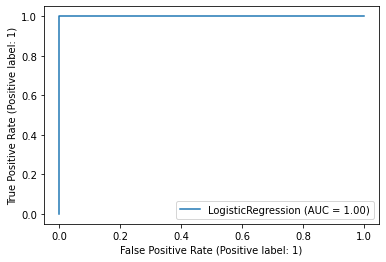

In [38]:
# Plot the ROC (Receiver Operating Characteristic) curve visualize our models accuracy rate
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)